<a href="https://colab.research.google.com/github/BDavidReyesU/Talento-tech/blob/main/SeriesdeTiempo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DESCOMPOSICION

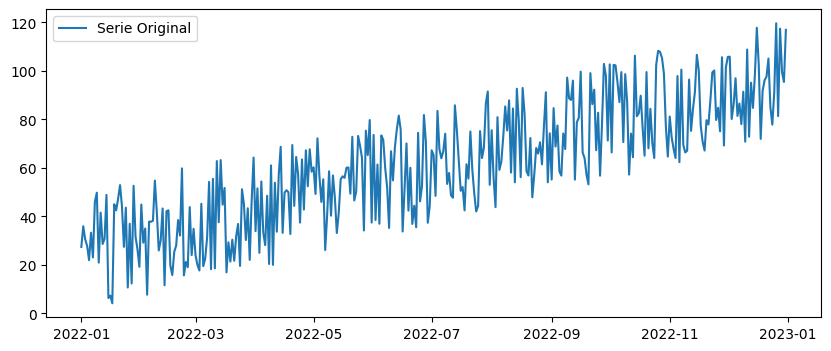

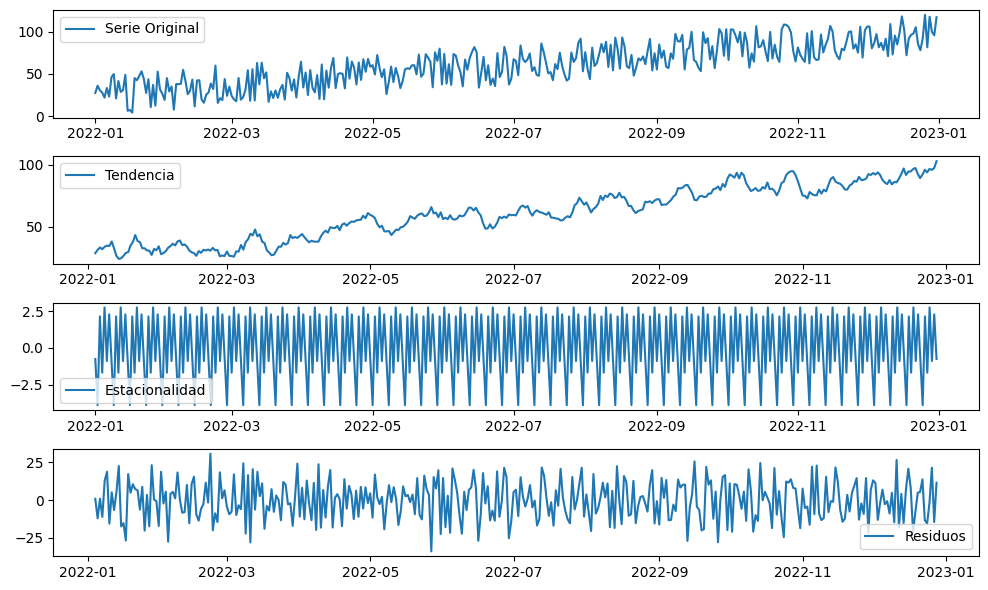

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Generar datos de ejemplo
np.random.seed(0)
dates = pd.date_range(start='2022-01-01', end='2022-12-31')
values = np.arange(len(dates))*.2 + np.random.rand(len(dates))*50
ts = pd.Series(values, index=dates)

# Gráfica de la serie original
plt.figure(figsize=(10, 4))
plt.plot(ts, label='Serie Original')
plt.legend()
plt.show()

# Descomposición de la serie de tiempo
decomposition = seasonal_decompose(ts, model='additive')

# Gráfica de la serie original
plt.figure(figsize=(10, 6))
plt.subplot(411)
plt.plot(ts, label='Serie Original')
plt.legend()

# Gráfica de la tendencia
plt.subplot(412)
plt.plot(decomposition.trend, label='Tendencia')
plt.legend()

# Gráfica de la estacionalidad
plt.subplot(413)
plt.plot(decomposition.seasonal, label='Estacionalidad')
plt.legend()

# Gráfica de los residuos
plt.subplot(414)
plt.plot(decomposition.resid, label='Residuos')
plt.legend()

plt.tight_layout()
plt.show()

# -Modelado (ARIMA)

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


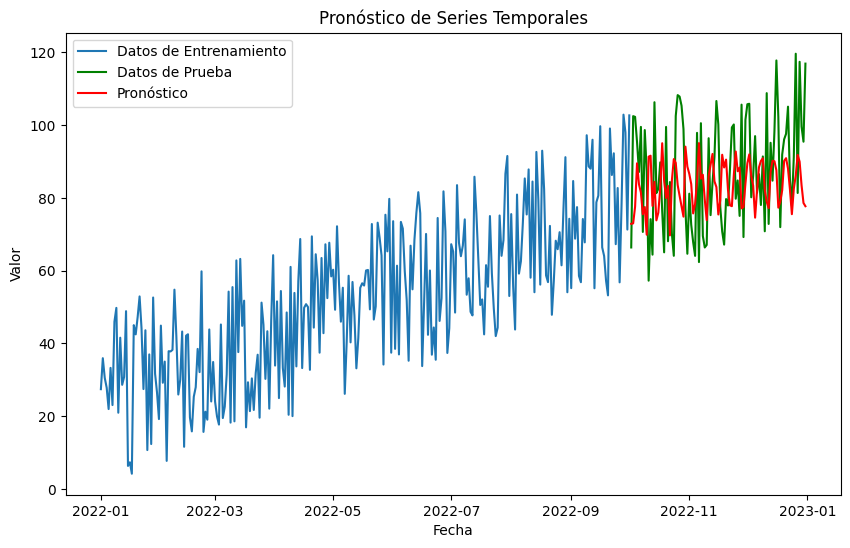

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Generar datos de ejemplo
np.random.seed(0)
dates = pd.date_range(start='2022-01-01', end='2022-12-31')
values = np.arange(len(dates)) * 0.2 + np.random.rand(len(dates)) * 50
ts = pd.Series(values, index=dates)

# Dividir los datos en entrenamiento y prueba
train_data = ts[:'2022-10-01']
test_data = ts['2022-10-02':]

# Ajustar el modelo ARIMA
model = ARIMA(train_data, order=(10, 1, 10))
model_fit = model.fit()

# Realizar el pronóstico
forecast = model_fit.forecast(steps=len(test_data))

# Gráfica de los datos originales y el pronóstico
plt.figure(figsize=(10, 6))
plt.plot(train_data, label='Datos de Entrenamiento')
plt.plot(test_data, label='Datos de Prueba', color='green')
plt.plot(test_data.index, forecast, label='Pronóstico', color='red')
plt.legend()
plt.title('Pronóstico de Series Temporales')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.show()

# Evaluacion

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from statsmodels.tsa.arima.model import ARIMA

# Generar datos de ejemplo
np.random.seed(0)
dates = pd.date_range(start='2022-01-01', end='2022-12-31')
values = np.arange(len(dates)) * 0.2 + np.random.rand(len(dates)) * 50
ts = pd.Series(values, index=dates)

# Dividir los datos en entrenamiento y prueba
train_data, test_data = train_test_split(ts, test_size=0.2, shuffle=False)

# Ajustar el modelo ARIMA
model = ARIMA(train_data, order=(10, 1, 10))
model_fit = model.fit()

# Realizar el pronóstico en los datos de prueba
forecast = model_fit.forecast(steps=len(test_data))

# Calcular el error absoluto medio (MAE)
mae = mean_absolute_error(test_data, forecast)

print('Error Absoluto Medio (MAE):', mae)

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error Absoluto Medio (MAE): 13.26124137437332


# Daily Temperature of Major Cities

In [12]:
import pandas as pd
df = pd.read_csv("city_temperature.csv")
print(df)
dfCol = df[df.Country=="Colombia"]
print(dfCol)

<ipython-input-12-436d7ba4c8c5>:2: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("city_temperature.csv")


                Region  Country                   State                  City  \
0               Africa  Algeria                     NaN               Algiers   
1               Africa  Algeria                     NaN               Algiers   
2               Africa  Algeria                     NaN               Algiers   
3               Africa  Algeria                     NaN               Algiers   
4               Africa  Algeria                     NaN               Algiers   
...                ...      ...                     ...                   ...   
2906322  North America       US  Additional Territories  San Juan Puerto Rico   
2906323  North America       US  Additional Territories  San Juan Puerto Rico   
2906324  North America       US  Additional Territories  San Juan Puerto Rico   
2906325  North America       US  Additional Territories  San Juan Puerto Rico   
2906326  North America       US  Additional Territories  San Juan Puerto Rico   

         Month  Day  Year  

In [13]:
# Convertir las columnas de año, mes y día a un índice DateTime
dfCol['Fecha'] = pd.to_datetime(dfCol[['Year', 'Month', 'Day']])
dfCol.set_index('Fecha', inplace=True)

print(dfCol)
print(dfCol['AvgTemperature'])

                                       Region   Country State    City  Month  \
Fecha                                                                          
1995-01-01  South/Central America & Carribean  Colombia   NaN  Bogota      1   
1995-01-02  South/Central America & Carribean  Colombia   NaN  Bogota      1   
1995-01-03  South/Central America & Carribean  Colombia   NaN  Bogota      1   
1995-01-04  South/Central America & Carribean  Colombia   NaN  Bogota      1   
1995-01-05  South/Central America & Carribean  Colombia   NaN  Bogota      1   
...                                       ...       ...   ...     ...    ...   
2020-05-09  South/Central America & Carribean  Colombia   NaN  Bogota      5   
2020-05-10  South/Central America & Carribean  Colombia   NaN  Bogota      5   
2020-05-11  South/Central America & Carribean  Colombia   NaN  Bogota      5   
2020-05-12  South/Central America & Carribean  Colombia   NaN  Bogota      5   
2020-05-13  South/Central America & Carr

<ipython-input-13-0f9d7ade7151>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfCol['Fecha'] = pd.to_datetime(dfCol[['Year', 'Month', 'Day']])


count    9266.000000
mean       55.243956
std        13.582404
min       -99.000000
25%        55.300000
50%        56.500000
75%        57.600000
max        66.700000
Name: AvgTemperature, dtype: float64


<Axes: ylabel='Frequency'>

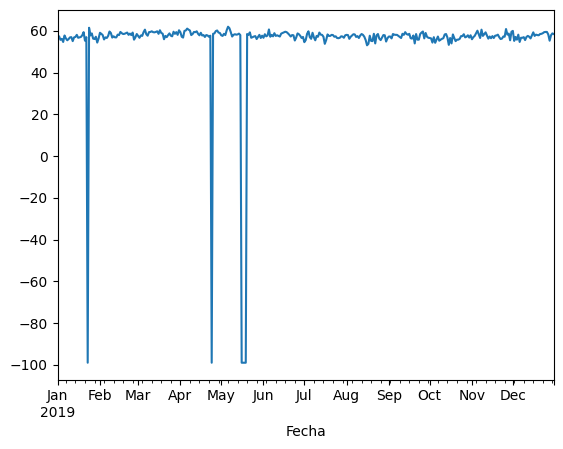

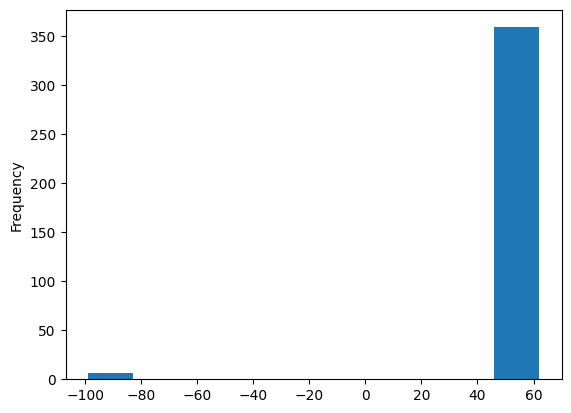

In [14]:
import matplotlib.pyplot as plt
print(dfCol['AvgTemperature'].describe())
plt.figure()
dfCol['AvgTemperature']['2019'].plot()
plt.figure()
dfCol['AvgTemperature']['2019'].plot.hist()


count    9266.000000
mean       55.243956
std        13.582404
min       -99.000000
25%        55.300000
50%        56.500000
75%        57.600000
max        66.700000
Name: AvgTemperature, dtype: float64


<Axes: ylabel='Frequency'>

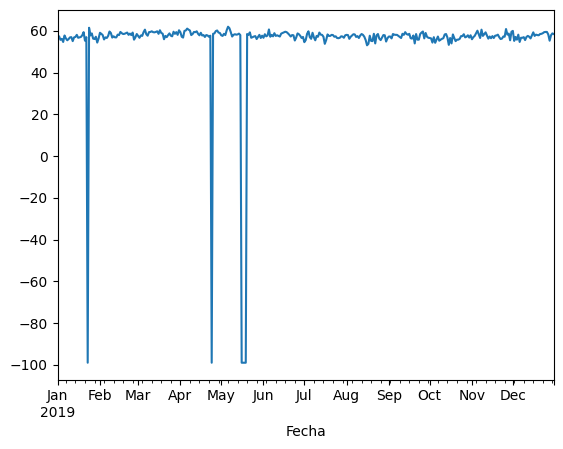

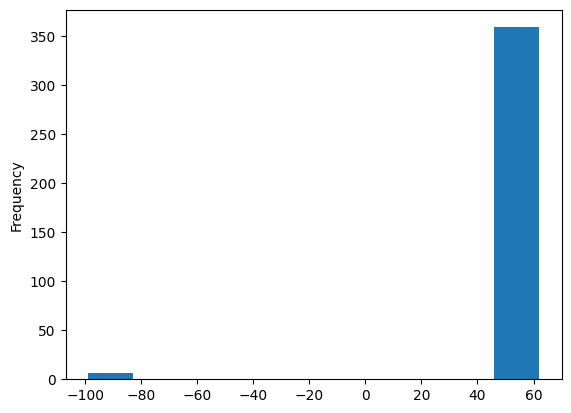

In [15]:
import matplotlib.pyplot as plt
print(dfCol['AvgTemperature'].describe())
plt.figure()
dfCol['AvgTemperature']['2019'].plot()
plt.figure()
dfCol['AvgTemperature']['2019'].plot.hist()


# RNN

time_series:  [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
train_data: [1 2 3 4 5 6 7 8 9]
test_data [10 11 12 13 14 15]
Conjunto de secuencias de entrenamiento:
 [[1 2 3 4]
 [2 3 4 5]
 [3 4 5 6]
 [4 5 6 7]
 [5 6 7 8]]
Etiquetas de entrenamiento:
 [5 6 7 8 9]
Conjunto de secuencias de prueba:
 [[10 11 12 13]
 [11 12 13 14]]
Etiquetas de prueba:
 [14 15]
Epoch 1/200
1/1 [==============================] - 1s 1s/step - loss: 32.0589
Epoch 2/200
1/1 [==============================] - 0s 12ms/step - loss: 29.8506
Epoch 3/200
1/1 [==============================] - 0s 13ms/step - loss: 27.7231
Epoch 4/200
1/1 [==============================] - 0s 12ms/step - loss: 25.6782
Epoch 5/200
1/1 [==============================] - 0s 15ms/step - loss: 23.7173
Epoch 6/200
1/1 [==============================] - 0s 13ms/step - loss: 21.8414
Epoch 7/200
1/1 [==============================] - 0s 14ms/step - loss: 20.0515
Epoch 8/200
1/1 [==============================] - 0s 14ms/step - loss: 18.3483
Epoc

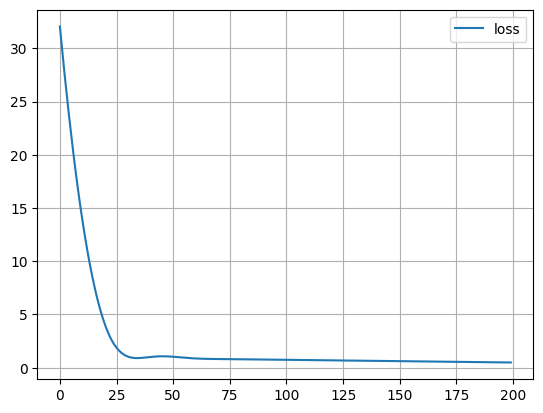

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN

# Paso 1: Preprocesamiento de datos (ejemplo básico)
# Supongamos que tenemos la siguiente serie de tiempo prueba
time_series = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15])
print("time_series: ",time_series)
train_size = int(len(time_series) * 0.6)  # Tamaño del conjunto de entrenamiento
train_data, test_data = time_series[:train_size], time_series[train_size:]
print("train_data:", train_data)
print("test_data",test_data)

# Paso 2: Preparación de datos (ejemplo básico)
# Por ejemplo, transformamos nuestros datos en secuencias
def create_dataset(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

# Definimos el número de pasos de tiempo para la serie temporal
seq_length = 4
# Creamos conjuntos de entrenamiento y prueba en formato 3D
X_train, y_train = create_dataset(train_data, seq_length)
X_test, y_test = create_dataset(test_data, seq_length)

# Imprimimos los conjuntos de datos en formato 3D
print("Conjunto de secuencias de entrenamiento:\n", X_train)
print("Etiquetas de entrenamiento:\n", y_train)
print("Conjunto de secuencias de prueba:\n", X_test)
print("Etiquetas de prueba:\n", y_test)


# Paso 3: Construcción del modelo
model = Sequential()
model.add(SimpleRNN(16, activation='relu', input_shape=(seq_length, 1)))
model.add(Dense(1))

# Paso 4: Compilacion del modelo
model.compile(optimizer='adam', loss='mse')  # Compilación del modelo

# Paso 5: Entrenamiento del modelo
history = model.fit(X_train, y_train, epochs=200)

#  Paso 6: Graficar el historial de entrenamiento:
pd.DataFrame(history.history).plot(grid=True)

# Paso 7: Evaluación del modelo
Evaluación = model.evaluate(X_test, y_test)
print(Evaluación)

# Paso 8: Predicción
print("X_test: \n",X_test)
print("y_test: \n",y_test)
y_pred = model.predict(X_test)
print("y_pred: \n",y_pred)